In [119]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures 

In [75]:
df=pd.read_csv('train.csv')

In [139]:
df['SalePrice']

0       208500
1       181500
2       223500
3       140000
4       250000
5       143000
6       307000
7       200000
8       129900
9       118000
10      129500
11      345000
12      144000
13      279500
14      157000
15      132000
16      149000
17       90000
18      159000
19      139000
20      325300
21      139400
22      230000
23      129900
24      154000
25      256300
26      134800
27      306000
28      207500
29       68500
30       40000
31      149350
32      179900
33      165500
34      277500
35      309000
36      145000
37      153000
38      109000
39       82000
40      160000
41      170000
42      144000
43      130250
44      141000
45      319900
46      239686
47      249700
48      113000
49      127000
50      177000
51      114500
52      110000
53      385000
54      130000
55      180500
56      172500
57      196500
58      438780
59      124900
60      158000
61      101000
62      202500
63      140000
64      219500
65      317000
66      18

In [9]:
df.tail()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
1455,1456,60,RL,62.0,7917,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,8,2007,WD,Normal,175000
1456,1457,20,RL,85.0,13175,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,MnPrv,NaN,0,2,2010,WD,Normal,210000
1457,1458,70,RL,66.0,9042,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,GdPrv,Shed,2500,5,2010,WD,Normal,266500
1458,1459,20,RL,68.0,9717,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,4,2010,WD,Normal,142125
1459,1460,20,RL,75.0,9937,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,6,2008,WD,Normal,147500


Data preprocessing

In [10]:
df.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,...,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,421.610009,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,...,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,365.750000,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,730.500000,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,...,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,1095.250000,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,...,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,...,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [76]:
df.duplicated().sum()

0

In [77]:
pd.options.display.max_rows=None 
df.isnull().sum()

Id                  0
MSSubClass          0
MSZoning            0
LotFrontage       259
LotArea             0
Street              0
Alley            1369
LotShape            0
LandContour         0
Utilities           0
LotConfig           0
LandSlope           0
Neighborhood        0
Condition1          0
Condition2          0
BldgType            0
HouseStyle          0
OverallQual         0
OverallCond         0
YearBuilt           0
YearRemodAdd        0
RoofStyle           0
RoofMatl            0
Exterior1st         0
Exterior2nd         0
MasVnrType          8
MasVnrArea          8
ExterQual           0
ExterCond           0
Foundation          0
BsmtQual           37
BsmtCond           37
BsmtExposure       38
BsmtFinType1       37
BsmtFinSF1          0
BsmtFinType2       38
BsmtFinSF2          0
BsmtUnfSF           0
TotalBsmtSF         0
Heating             0
HeatingQC           0
CentralAir          0
Electrical          1
1stFlrSF            0
2ndFlrSF            0
LowQualFin

In [68]:
df.isnull().sum().sum()

17

In [79]:
df.drop(['Alley','PoolQC','Fence','MiscFeature','Id','FireplaceQu'],axis=1,inplace=True)

KeyError: "['Alley', 'PoolQC', 'Fence', 'MiscFeature', 'Id', 'FireplaceQu'] not found in axis"

In [80]:
df.isnull().sum().sum()

868

Filling the categorical data

In [81]:
df['LotFrontage']=df['LotFrontage'].fillna('nan')
df['BsmtQual']=df['BsmtQual'].fillna('nan')
df['BsmtCond']=df['BsmtCond'].fillna('nan')
df['BsmtExposure']=df['BsmtExposure'].fillna('nan')
df['GarageType']=df['GarageType'].fillna('nan')
df['BsmtFinType2']=df['BsmtFinType2'].fillna('nan')
df['BsmtFinType1']=df['BsmtFinType1'].fillna('nan')
df['GarageFinish']=df['GarageFinish'].fillna('nan')
df['GarageQual']=df['GarageQual'].fillna('nan')
df['GarageCond']=df['GarageCond'].fillna('nan')


Filling the numerical data

In [82]:
df['GarageYrBlt']=df['GarageYrBlt'].fillna(df['GarageYrBlt'].median()))


In [97]:
df['Electrical']

0       SBrkr
1       SBrkr
2       SBrkr
3       SBrkr
4       SBrkr
5       SBrkr
6       SBrkr
7       SBrkr
8       FuseF
9       SBrkr
10      SBrkr
11      SBrkr
12      SBrkr
13      SBrkr
14      SBrkr
15      FuseA
16      SBrkr
17      SBrkr
18      SBrkr
19      SBrkr
20      SBrkr
21      FuseF
22      SBrkr
23      SBrkr
24      SBrkr
25      SBrkr
26      SBrkr
27      SBrkr
28      SBrkr
29      SBrkr
30      SBrkr
31      SBrkr
32      SBrkr
33      SBrkr
34      SBrkr
35      SBrkr
36      SBrkr
37      SBrkr
38      SBrkr
39      FuseP
40      SBrkr
41      SBrkr
42      SBrkr
43      SBrkr
44      FuseA
45      SBrkr
46      SBrkr
47      SBrkr
48      SBrkr
49      SBrkr
50      SBrkr
51      SBrkr
52      SBrkr
53      SBrkr
54      SBrkr
55      SBrkr
56      SBrkr
57      SBrkr
58      SBrkr
59      SBrkr
60      SBrkr
61      SBrkr
62      SBrkr
63      SBrkr
64      SBrkr
65      SBrkr
66      SBrkr
67      SBrkr
68      SBrkr
69      SBrkr
70      SBrkr
71    

Data Visualisation

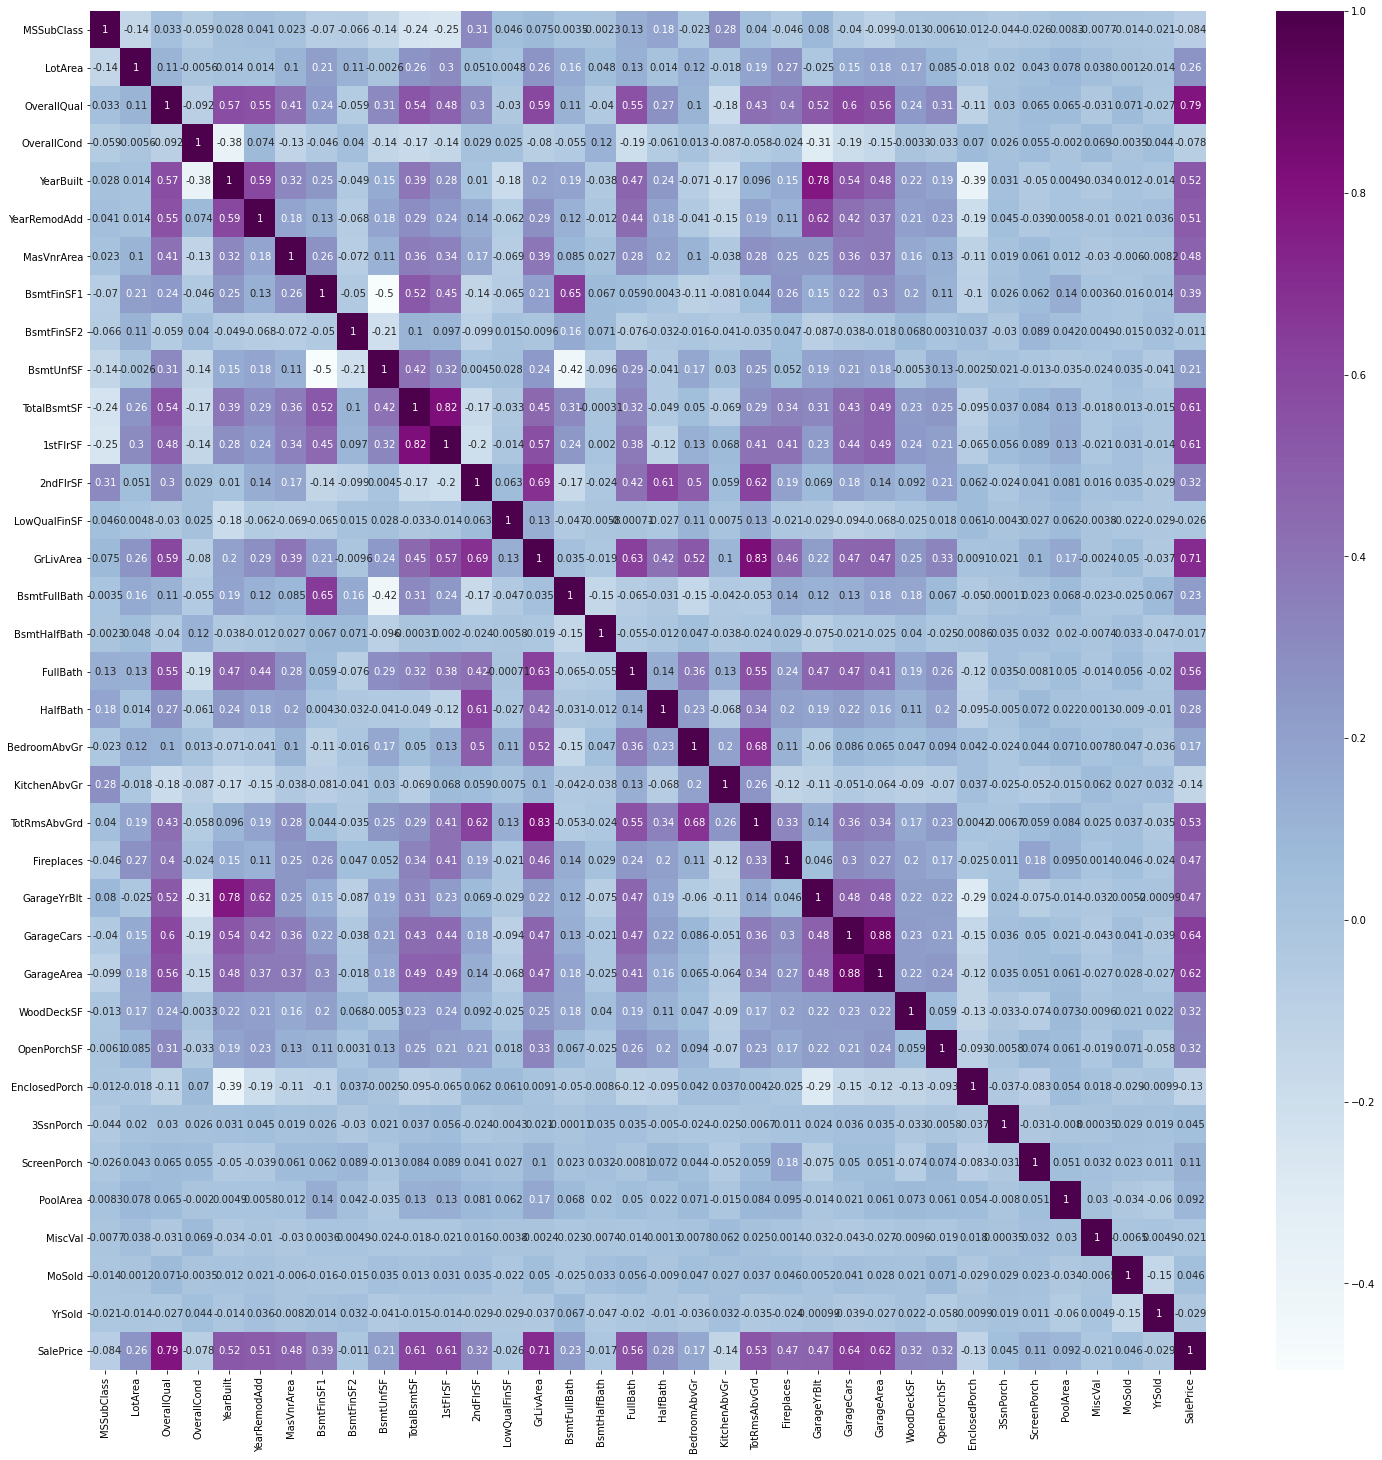

In [91]:
plt.figure(figsize=(25,25))
sns.heatmap(df.corr(),cmap="BuPu",annot=True)
plt.show()

The most feature who have high correlation with SalePrice

 OverallQual GarageCars GarageArea GrLivArea TotalBsmtSF 1stFlrSF

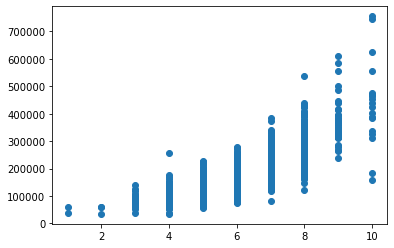

In [117]:
plt.scatter(x="OverallQual", y="SalePrice", data=df)

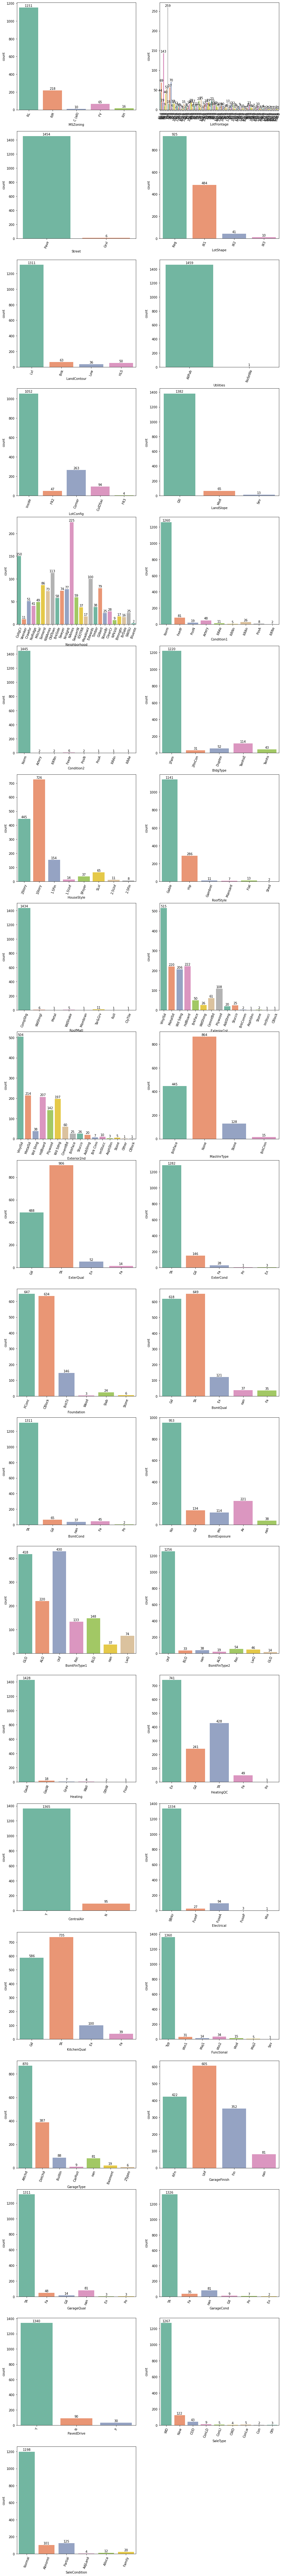

In [94]:
dfobj = list(columns for columns in df.select_dtypes([object]).columns)
plt.figure(figsize=(15,150))
plotnumber=1
for c in dfobj:
    ax=plt.subplot(20,2,plotnumber)
    b= sns.countplot(x=df[c],palette='Set2')
    plt.xticks(rotation=70)
    plotnumber+=1
    for bar in b.patches:
        b.annotate(format(bar.get_height()),
            (bar.get_x() + bar.get_width() / 2,
            bar.get_height()), ha='center', va='center',
            size=10, xytext=(0, 6),textcoords='offset points')
plt.show() 

/home/achraf/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/home/achraf/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/home/achraf/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or

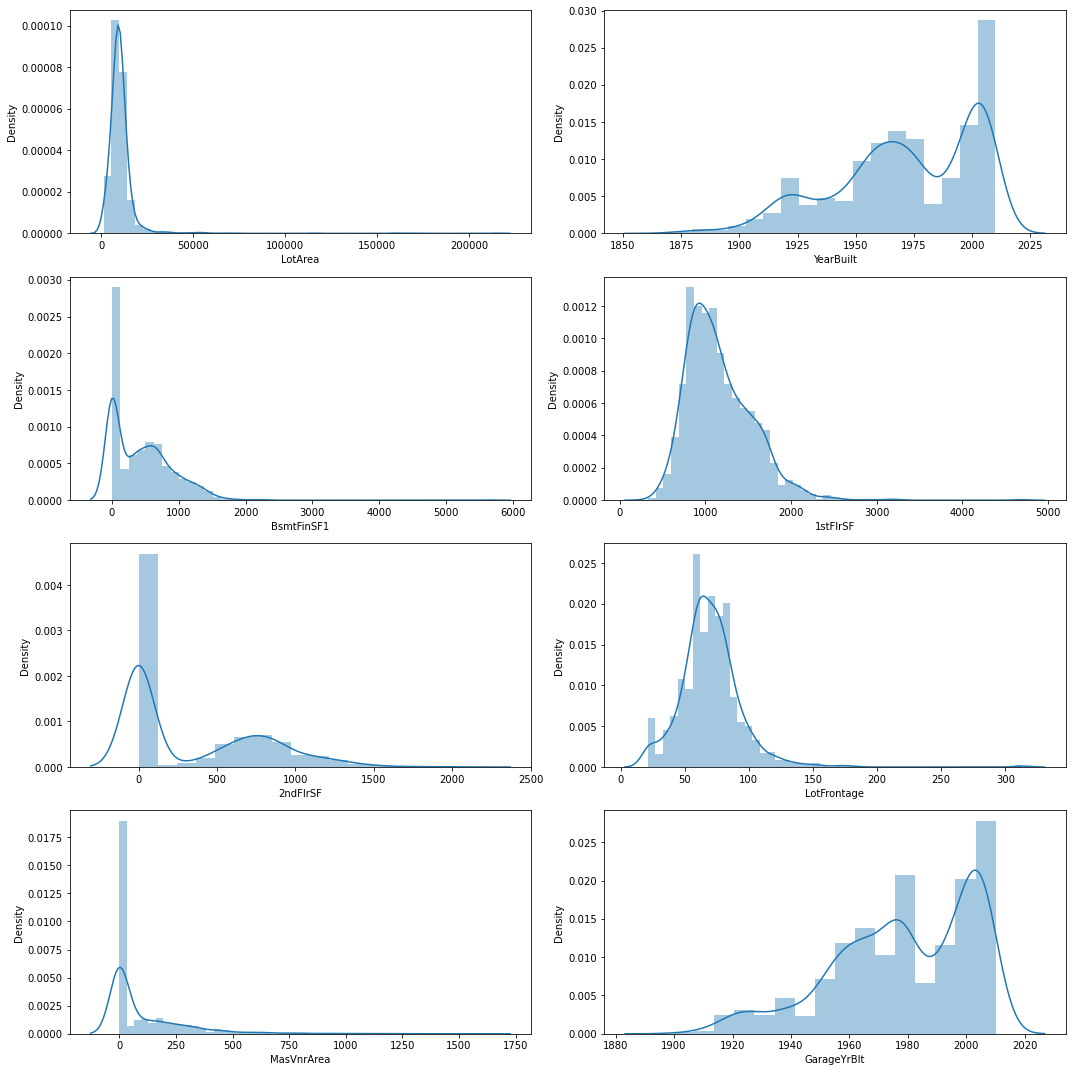

In [102]:
dfnum=df[['LotArea','YearBuilt','BsmtFinSF1','1stFlrSF','2ndFlrSF','LotFrontage', 'MasVnrArea', 'GarageYrBlt']]
plt.figure(figsize=(15,15),facecolor='white')

plotnum=1 #counter

for c in dfnum:
    if(plotnum<9):
        a=plt.subplot(4,2,plotnum)#plotting 8 graph
        sns.distplot(dfnum[c])#to know distribution
    plotnum+=1#increment counter
plt.tight_layout()   

In [111]:
le = LabelEncoder()

for features in dfobj:
    df[features] = le.fit_transform(df[features].astype(str))

print (df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 75 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   MSSubClass     1460 non-null   int64  
 1   MSZoning       1460 non-null   int64  
 2   LotFrontage    1460 non-null   int64  
 3   LotArea        1460 non-null   int64  
 4   Street         1460 non-null   int64  
 5   LotShape       1460 non-null   int64  
 6   LandContour    1460 non-null   int64  
 7   Utilities      1460 non-null   int64  
 8   LotConfig      1460 non-null   int64  
 9   LandSlope      1460 non-null   int64  
 10  Neighborhood   1460 non-null   int64  
 11  Condition1     1460 non-null   int64  
 12  Condition2     1460 non-null   int64  
 13  BldgType       1460 non-null   int64  
 14  HouseStyle     1460 non-null   int64  
 15  OverallQual    1460 non-null   int64  
 16  OverallCond    1460 non-null   int64  
 17  YearBuilt      1460 non-null   int64  
 18  YearRemo

Split data 

In [131]:
x=df[['OverallQual','GarageCars','GarageArea','GrLivArea']] ## all the features
y=df['SalePrice']  
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.20,random_state=0)

Linear Model

In [132]:
lr = LinearRegression() 
lr.fit(x_train,y_train)

LinearRegression()

In [133]:
lr.score(x_test, y_test)

0.6815125710484387

Polynomial model

In [134]:
plr = LinearRegression() 
poly = PolynomialFeatures(degree = 2) 
x_=poly.fit_transform(x_train)
plr.fit(x_, y_train) 

LinearRegression()

In [135]:
x_test_=poly.fit_transform(x_test)
plr.score(x_test_, y_test)

0.803480255543013